In [205]:
# data science
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
filepath = "../Data/clean_life_expectancy.csv"

df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,country,year,life_expectancy,smoking_deaths,obesity_deaths,deaths_by_suicide,mean_years_of_schooling,population,gdp,gov_health_expenditure
0,0,Afghanistan,2002,56.4538,4.484723,109.050644,7.85,1.522516,21000258,1280.4631,1.21
1,1,Afghanistan,2003,57.3445,4.593383,110.698310,7.72,1.579871,22645136,1292.3335,5.46
2,2,Afghanistan,2004,57.9436,4.665421,113.260590,7.77,1.637226,23553554,1260.0605,3.60
3,3,Afghanistan,2005,58.3608,4.708809,115.482414,7.64,1.694581,24411196,1352.3207,3.37
4,4,Afghanistan,2006,58.6844,4.746228,119.301240,7.56,1.776703,25442946,1366.9932,2.72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1365 non-null   int64  
 1   country                  1365 non-null   object 
 2   year                     1365 non-null   int64  
 3   life_expectancy          1365 non-null   float64
 4   smoking_deaths           1365 non-null   float64
 5   obesity_deaths           1365 non-null   float64
 6   deaths_by_suicide        1365 non-null   float64
 7   mean_years_of_schooling  1365 non-null   float64
 8   population               1365 non-null   int64  
 9   gdp                      1365 non-null   float64
 10  gov_health_expenditure   1365 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 117.4+ KB


In [86]:
cols = ["year","life_expectancy","gov_health_expenditure","country","population"]
df[cols].describe()

,year,life_expectancy,gov_health_expenditure,population
count,1365.000000,1365.000000,1365.000000,1.365000e+03
mean,2010.675458,65.226921,8.156593,6.636804e+07
std,5.185222,8.134401,4.782531,2.092548e+08
min,2002.000000,42.125400,0.730000,9.717610e+05
25%,2006.000000,59.349100,4.790000,6.044130e+06
50%,2011.000000,65.731400,7.130000,1.523498e+07
75%,2015.000000,71.963800,10.250000,3.510727e+07
max,2019.000000,79.726200,33.100000,1.421864e+09


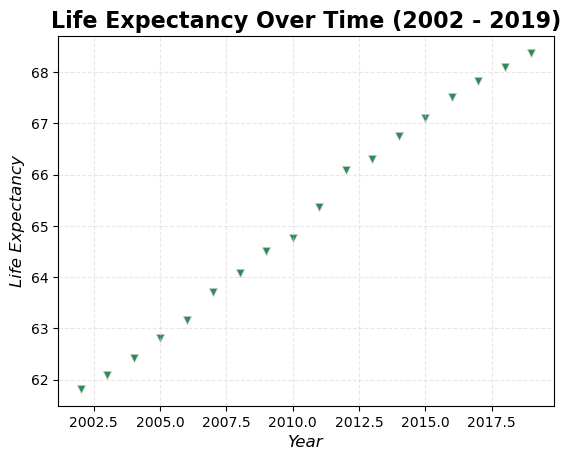

In [39]:
# Get the average life expectancy of each year so that the plot is cleaner, without this a point is plotted for every country in every year
df_avg_life = df.groupby("year")["life_expectancy"].mean().reset_index()

# Build scatter plot for latitude vs. temperature
plt.scatter(df_avg_life["year"], df_avg_life["life_expectancy"], color="seagreen", marker="v", edgecolors='lightgrey', lw=0.5)

# Incorporate the other graph properties
plt.title("Life Expectancy Over Time (2002 - 2019)", fontweight="bold", fontsize=16)
plt.ylabel("Life Expectancy", fontsize=12, fontstyle="italic")
plt.xlabel("Year", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Show plot
plt.show()

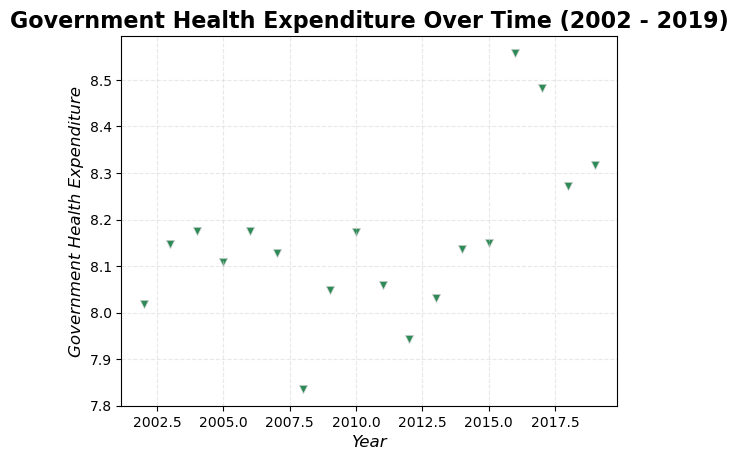

In [48]:
# Get the average gov_health_expenditure of each year so that the plot is cleaner, without this a point is plotted for every country in every year
df_avg_spend = df.groupby("year")["gov_health_expenditure"].mean().reset_index()

# Build scatter plot for latitude vs. temperature
plt.scatter(df_avg_spend["year"], df_avg_spend["gov_health_expenditure"], color="seagreen", marker="v", edgecolors='lightgrey', lw=0.5)

# Incorporate the other graph properties
plt.title("Government Health Expenditure Over Time (2002 - 2019)", fontweight="bold", fontsize=16)
plt.ylabel("Government Health Expenditure", fontsize=12, fontstyle="italic")
plt.xlabel("Year", fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Show plot
plt.show()

In [74]:
# Create dataframe for linear regression
# Added in country, year, population to see if  incorporating them added more context to the plot

df_lr = df[["life_expectancy", "gov_health_expenditure", "year", "country", "population"]]
df_lr.head()

,life_expectancy,gov_health_expenditure,year,country,population
0,56.4538,1.21,2002,Afghanistan,21000258
1,57.3445,5.46,2003,Afghanistan,22645136
2,57.9436,3.60,2004,Afghanistan,23553554
3,58.3608,3.37,2005,Afghanistan,24411196
4,58.6844,2.72,2006,Afghanistan,25442946


In [52]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   life_expectancy         1365 non-null   float64
 1   gov_health_expenditure  1365 non-null   float64
 2   year                    1365 non-null   int64  
 3   country                 1365 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 42.8+ KB


In [127]:
# Linear Regression

X = df_lr[['gov_health_expenditure']]
y = df_lr['life_expectancy']

lr = LinearRegression()

# Fit the model
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

# Linear regression equation
intercept = lr.intercept_
slope = lr.coef_[0]
linear_equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Calculate R-squared
r_squared = lr.score(X, y)

# Print the performance metrics
r_squared

0.17486066229126596

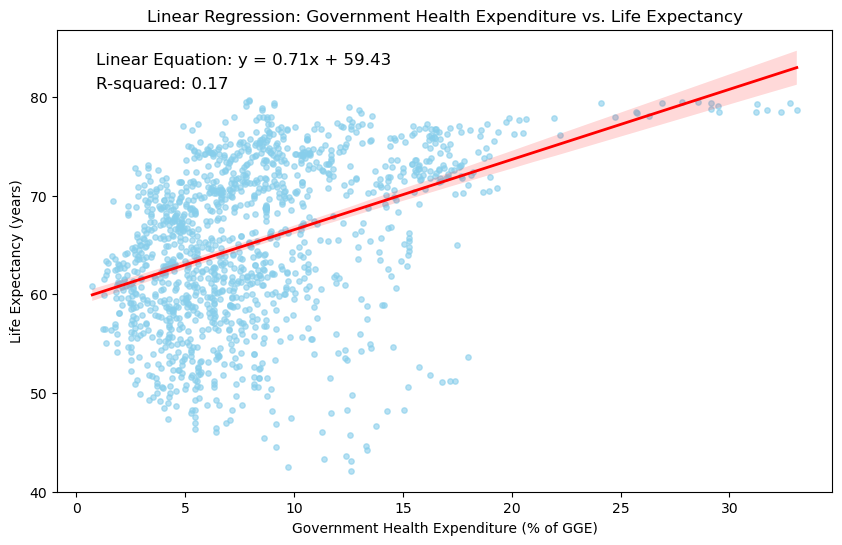

In [139]:
# Basic regression plot
plt.figure(figsize=(10, 6))

sns.regplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    data=df_lr,
    ci=95,
    line_kws={'color': 'red', 'linewidth': 2},
    scatter_kws={'color': 'skyblue', 's': 15, 'alpha': 0.6}
)


# Add annotations for the linear equation and R-squared value
plt.annotate(
    f'Linear Equation: {linear_equation}',
    xy=(0.05, 0.95), xycoords='axes fraction',
    horizontalalignment='left', verticalalignment='top',
    fontsize=12, color='black'
)

plt.annotate(
    f'R-squared: {r_squared:.2f}',
    xy=(0.05, 0.90), xycoords='axes fraction',
    horizontalalignment='left', verticalalignment='top',
    fontsize=12, color='black'
)

plt.title('Linear Regression: Government Health Expenditure vs. Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GGE)')
plt.ylabel('Life Expectancy (years)')
plt.show()

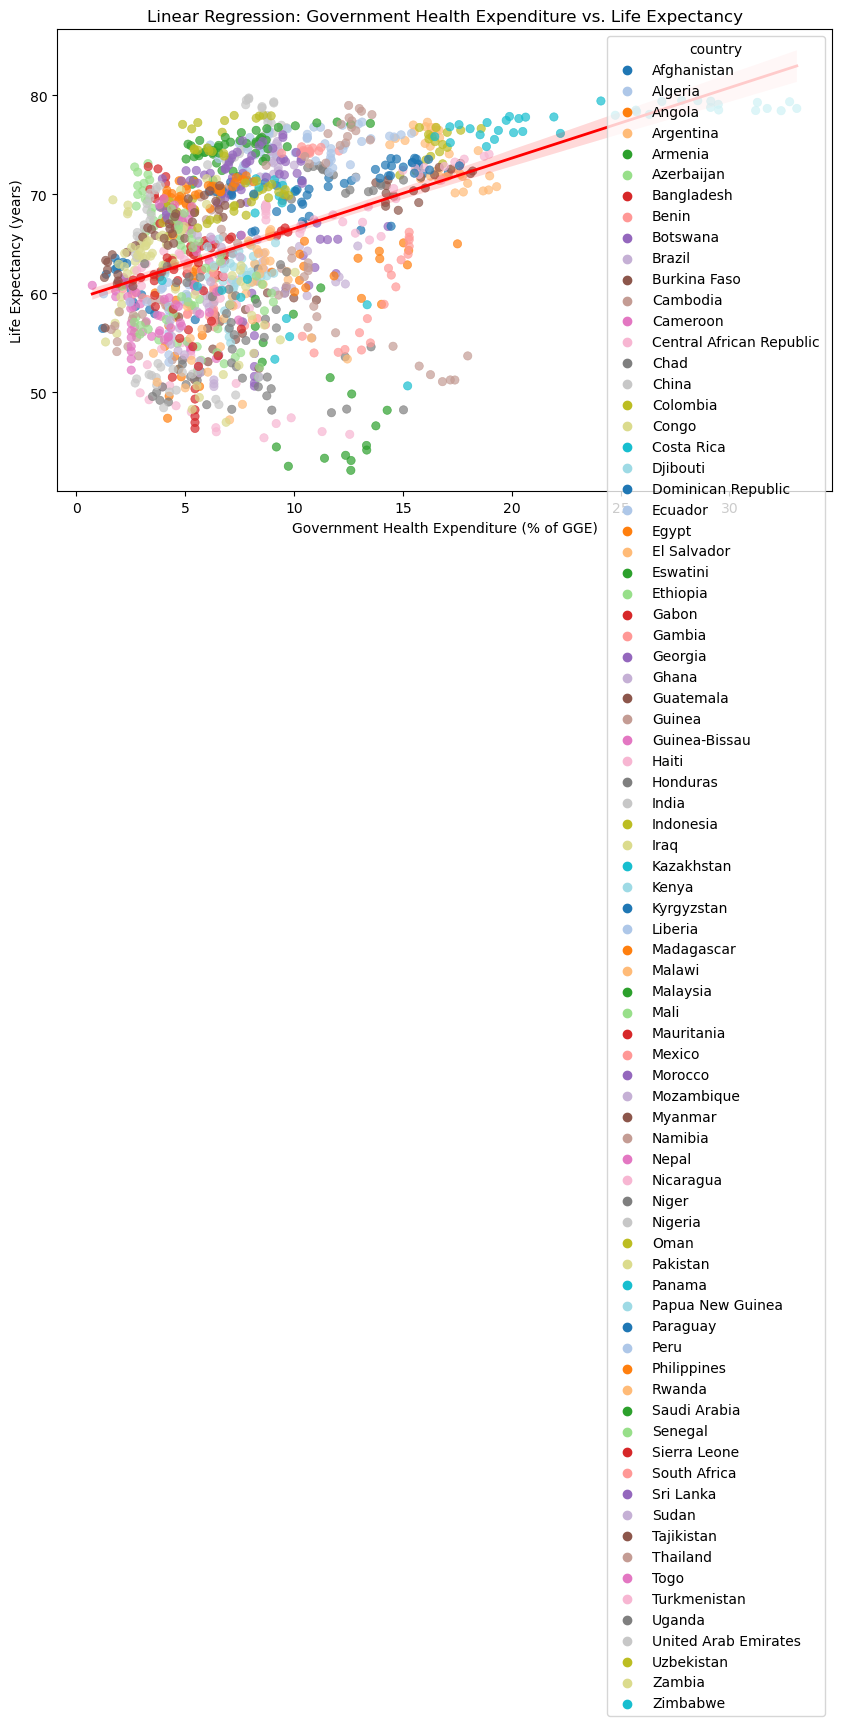

In [81]:
# Plot the linear regression
# used chatgpt and seaborn documentation to enhance the plot with other arguments


plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    hue='country', # using just country results in a legend that is far too large along with way too many hues
    data=df_lr,
    palette='tab20',  # Use a colormap suitable for many categories
    alpha=0.7,
    edgecolor=None
)

# Plot the regression line without hue
sns.regplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    data=df_lr,
    scatter=False,
    ci=95,
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('Linear Regression: Government Health Expenditure vs. Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GGE)')
plt.ylabel('Life Expectancy (years)')
plt.show()

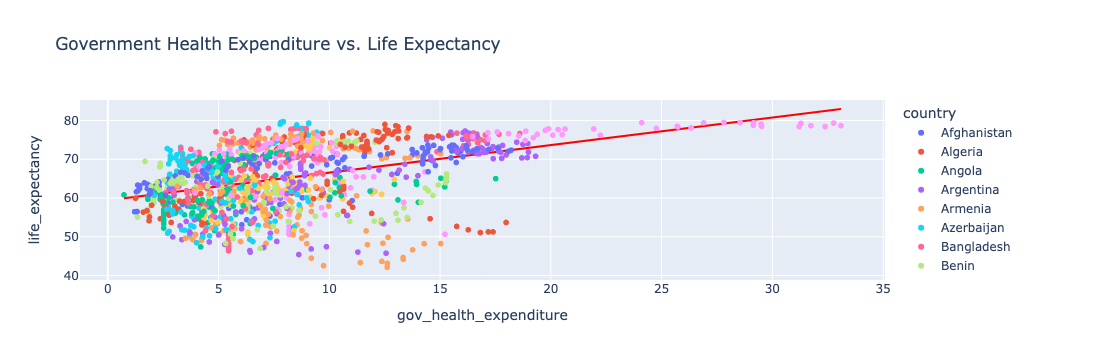

In [62]:
# Create an interactive plot
# created with the help of chatgpt

fig = px.scatter(df_lr, x='gov_health_expenditure', y='life_expectancy', color='country', hover_name='country', title='Government Health Expenditure vs. Life Expectancy')
fig.add_scatter(x=df_lr['gov_health_expenditure'], y=lr.predict(df_lr[['gov_health_expenditure']]), mode='lines', name='Regression Line', line=dict(color='red'))

fig.show()

In [ ]:
# recreate plots from above with years as the extra detail instead of country


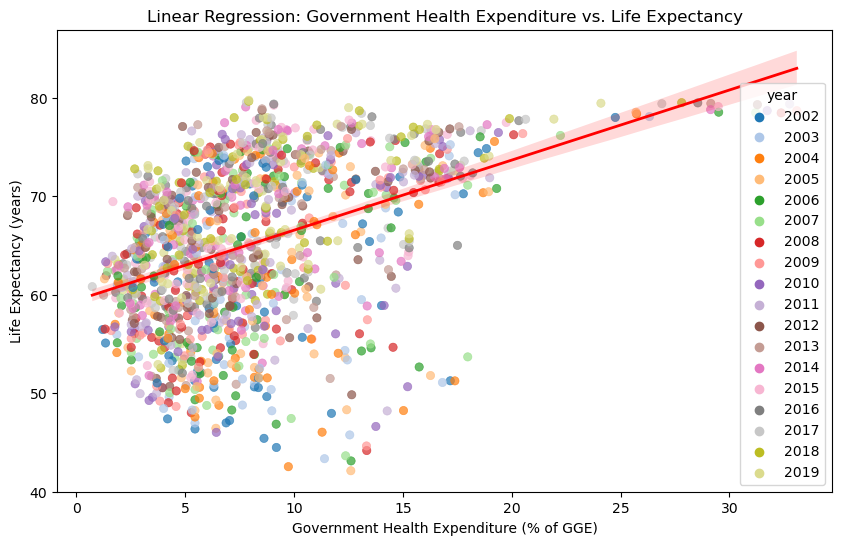

In [79]:
# Plot the linear regression
# used chatgpt and seaborn documentation to enhance the plot with other arguments


plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    hue='year',
    data=df_lr,
    palette='tab20',  # Use a colormap suitable for many categories
    alpha=0.7,
    edgecolor=None
)

# Plot the regression line without hue
sns.regplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    data=df_lr,
    scatter=False,
    ci=95,
    line_kws={'color': 'red', 'linewidth': 2}
)
#sns.regplot(
#    x='gov_health_expenditure',
#    y='life_expectancy',
#    hue='country',
#    data=df,
#    ci=95,
#    line_kws={'color': 'red', 'linewidth': 2},
#    scatter_kws={'color': 'skyblue', 's': 15, 'alpha': 0.6}
#)



plt.title('Linear Regression: Government Health Expenditure vs. Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GGE)')
plt.ylabel('Life Expectancy (years)')
plt.show()

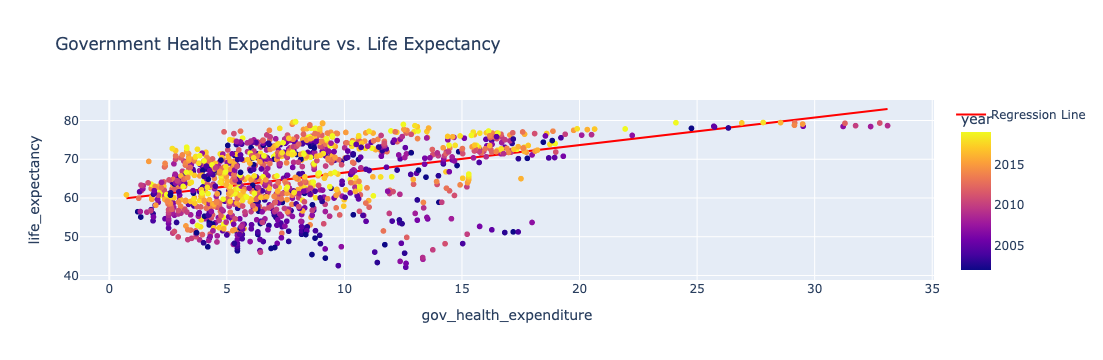

In [67]:
# Create an interactive plot
# created with the help of chatgpt

fig = px.scatter(df_lr, x='gov_health_expenditure', y='life_expectancy', color='year', hover_name='year', title='Government Health Expenditure vs. Life Expectancy')
fig.add_scatter(x=df_lr['gov_health_expenditure'], y=lr.predict(df_lr[['gov_health_expenditure']]), mode='lines', name='Regression Line', line=dict(color='red'))

fig.show()

In [ ]:
# recreate plots from above with population as the extra detail instead of country


In [105]:
# Create population buckets
#population_labels = ['< 10M', '10M-50M', '50M-100M', '100M-500M', '> 500M']
#df_lr['population_bucket'] = pd.cut(
#    df_lr['population'],
#    bins=[0, 1e7, 5e7, 1e8, 5e8, 1e9],
#    labels=population_labels,
#    right=False # added to ensure correct ordering in legend
#)

# ensure proper order for plotting legend later on
#df_lr['population_bucket'] = pd.Categorical(df_lr['population_bucket'], categories=population_labels, ordered=True)



# use quantiles to create buckets
# Create population buckets based on quantiles
population_quantiles = df_lr['population'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]).tolist()
population_labels = [f'< {int(population_quantiles[1]/1e6)}M',
                     f'{int(population_quantiles[1]/1e6)}M-{int(population_quantiles[2]/1e6)}M',
                     f'{int(population_quantiles[2]/1e6)}M-{int(population_quantiles[3]/1e6)}M',
                     f'{int(population_quantiles[3]/1e6)}M-{int(population_quantiles[4]/1e6)}M',
                     f'> {int(population_quantiles[4]/1e6)}M']
df_lr['population_bucket'] = pd.qcut(df_lr['population'], q=5, labels=population_labels)

# Ensure the categories are ordered properly
df_lr['population_bucket'] = pd.Categorical(df_lr['population_bucket'], categories=population_labels, ordered=True)

df_lr.head()

/var/folders/m0/r4_vfmn96hzdfnwx72xx60sm0000gn/T/ipykernel_82814/1036684523.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m0/r4_vfmn96hzdfnwx72xx60sm0000gn/T/ipykernel_82814/1036684523.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,life_expectancy,gov_health_expenditure,year,country,population,population_bucket
0,56.4538,1.21,2002,Afghanistan,21000258,10M-21M
1,57.3445,5.46,2003,Afghanistan,22645136,21M-43M
2,57.9436,3.60,2004,Afghanistan,23553554,21M-43M
3,58.3608,3.37,2005,Afghanistan,24411196,21M-43M
4,58.6844,2.72,2006,Afghanistan,25442946,21M-43M


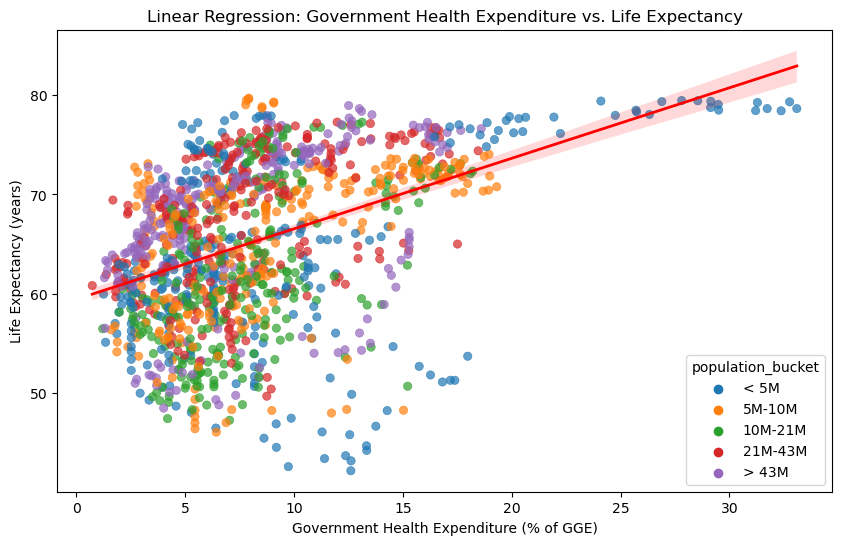

In [106]:
# Plot the linear regression
# used chatgpt and seaborn documentation to enhance the plot with other arguments


plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    hue='population_bucket',
    data=df_lr,
    #palette='tab10',  # Use a colormap suitable for many categories
    alpha=0.7,
    edgecolor=None
)

# Plot the regression line without hue
sns.regplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    data=df,
    scatter=False,
    ci=95,
    line_kws={'color': 'red', 'linewidth': 2}
)



plt.title('Linear Regression: Government Health Expenditure vs. Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GGE)')
plt.ylabel('Life Expectancy (years)')
plt.show()

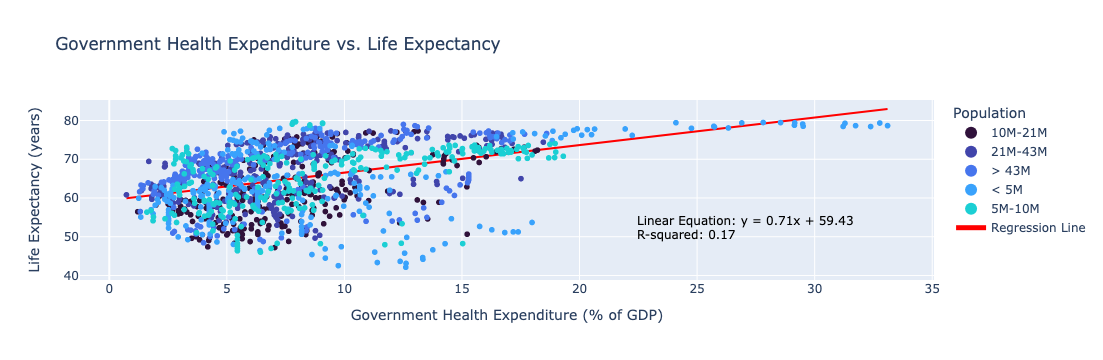

In [138]:
# Create an interactive plot
# created with the help of chatgpt

fig = px.scatter(
    df_lr,
    x='gov_health_expenditure',
    y='life_expectancy',
    color='population_bucket',
    hover_name='country',  # Main field for hover info
    hover_data={
        'life_expectancy': True,
        'gov_health_expenditure': True,
        'year': True,  # Add year to hover information
        'population': True,  # Add population to hover information
    },
    title='Government Health Expenditure vs. Life Expectancy',
    color_discrete_sequence=px.colors.sequential.Turbo  # Use a suitable color sequence
)


# Add the regression line
fig.add_scatter(
    x=df_lr['gov_health_expenditure'],
    y=lr.predict(df_lr[['gov_health_expenditure']]),
    mode='lines',
    name='Regression Line',
    line=dict(color='red')
)

# Update the layout to ensure the legend is correctly ordered
fig.update_layout(
    legend=dict(
        title='Population',
        itemsizing='constant'
    ),
    xaxis_title='Government Health Expenditure (% of GDP)',
    yaxis_title='Life Expectancy (years)',
    annotations=[
        dict(
            xref='paper', yref='paper',
            x=0.65, y=0.28,
            xanchor='left', yanchor='bottom',
            text=f'Linear Equation: {linear_equation}',
            showarrow=False,
            font=dict(size=12, color='black')
        ),
        dict(
            xref='paper', yref='paper',
            x=0.65, y=0.2,
            xanchor='left', yanchor='bottom',
            text=f'R-squared: {r_squared:.2f}',
            showarrow=False,
            font=dict(size=12, color='black')
        )
    ]
)

fig.show()

In [45]:
# Create dataframe for linear regression with yearly averages

df_avg = df.groupby('year')[['life_expectancy', 'gov_health_expenditure']].mean().reset_index()
df_avg.head()

,year,life_expectancy,gov_health_expenditure
0,2002,61.819611,8.018592
1,2003,62.085334,8.148219
2,2004,62.416760,8.175890
3,2005,62.808570,8.108243
4,2006,63.169788,8.174658


In [46]:
# Linear Regression

X = df_avg[['gov_health_expenditure']]
y = df_avg['life_expectancy']

lr = LinearRegression()

# Fit the model
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

# Calculate R-squared
r2 = lr.score(X, y)

# Print the performance metrics
r2

0.24824206070206134

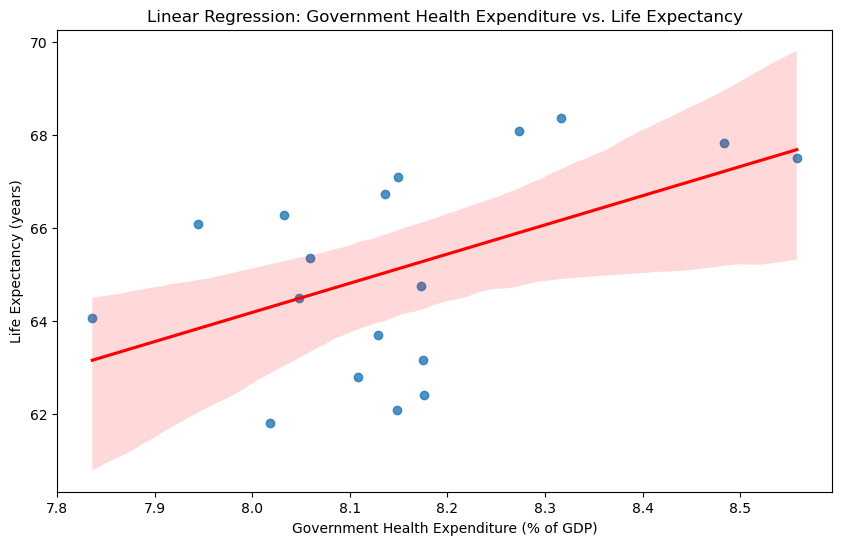

In [47]:
# Plot the linear regression

plt.figure(figsize=(10, 6))
sns.regplot(x='gov_health_expenditure', y='life_expectancy', data=df_avg, line_kws={'color': 'red'})
plt.title('Linear Regression: Government Health Expenditure vs. Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy (years)')
plt.show()

In [115]:
# Create dataframe for linear regression with country averages

df_avg_country = df.groupby('country')[['life_expectancy', 'gov_health_expenditure', 'population']].mean().reset_index()
df_avg_country.head()

,country,life_expectancy,gov_health_expenditure,population
0,Afghanistan,60.706917,2.450000,2.930117e+07
1,Algeria,73.851694,9.350556,3.657804e+07
2,Angola,56.437317,4.747778,2.424106e+07
3,Argentina,75.902183,16.143333,4.134101e+07
4,Armenia,73.255157,6.165714,2.949583e+06


In [116]:
# Linear Regression

X = df_avg_country[['gov_health_expenditure']]
y = df_avg_country['life_expectancy']

lr = LinearRegression()

# Fit the model
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

# Calculate R-squared
r2 = lr.score(X, y)

# Print the performance metrics
r2

0.21364886109932213

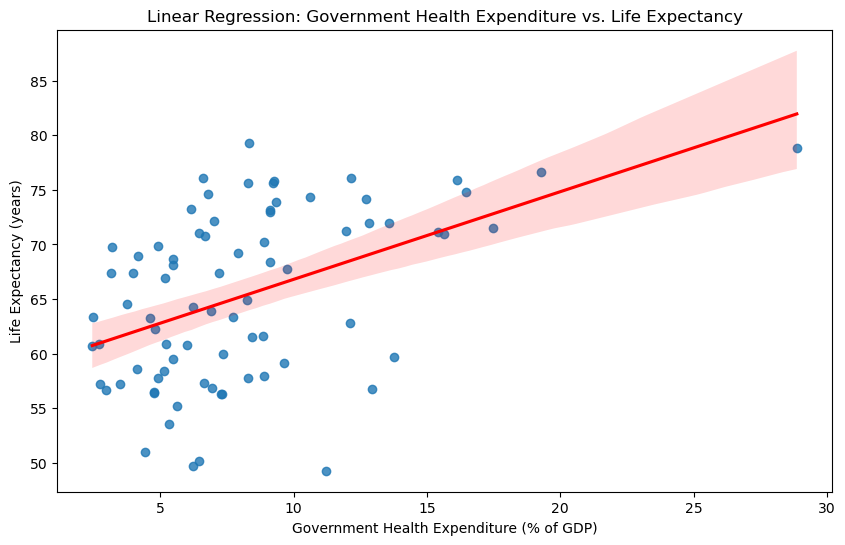

In [141]:
# Plot the linear regression

plt.figure(figsize=(10, 6))
sns.regplot(x='gov_health_expenditure', y='life_expectancy', data=df_avg_country, line_kws={'color': 'red'})
plt.title('Linear Regression: Government Health Expenditure vs. Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy (years)')
plt.show()

In [118]:
# Create population buckets based on quantiles
population_quantiles = df_avg_country['population'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0]).tolist()
population_labels = [f'< {int(population_quantiles[1]/1e6)}M',
                     f'{int(population_quantiles[1]/1e6)}M-{int(population_quantiles[2]/1e6)}M',
                     f'{int(population_quantiles[2]/1e6)}M-{int(population_quantiles[3]/1e6)}M',
                     f'{int(population_quantiles[3]/1e6)}M-{int(population_quantiles[4]/1e6)}M',
                     f'> {int(population_quantiles[4]/1e6)}M']
df_avg_country['population_bucket'] = pd.qcut(df_avg_country['population'], q=5, labels=population_labels)

# Ensure the categories are ordered properly
df_avg_country['population_bucket'] = pd.Categorical(df_avg_country['population_bucket'], categories=population_labels, ordered=True)

df_avg_country.head()

,country,life_expectancy,gov_health_expenditure,population,population_bucket
0,Afghanistan,60.706917,2.450000,2.930117e+07,21M-41M
1,Algeria,73.851694,9.350556,3.657804e+07,21M-41M
2,Angola,56.437317,4.747778,2.424106e+07,21M-41M
3,Argentina,75.902183,16.143333,4.134101e+07,21M-41M
4,Armenia,73.255157,6.165714,2.949583e+06,< 5M


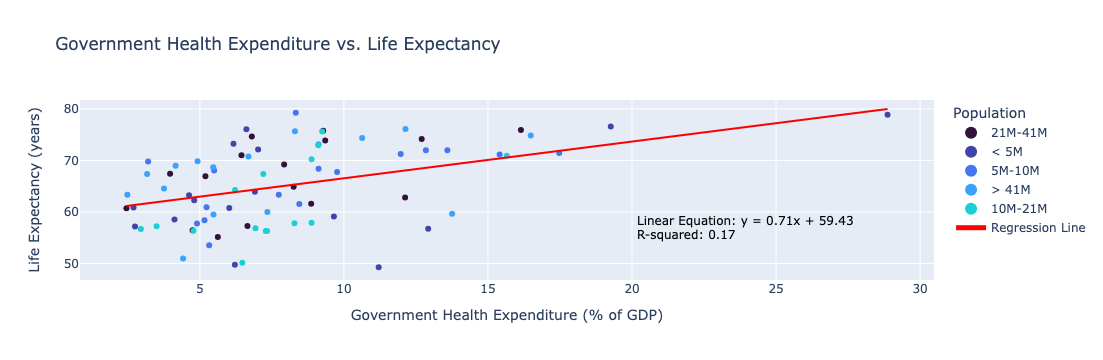

In [137]:
# Create an interactive plot
# created with the help of chatgpt

fig = px.scatter(
    df_avg_country,
    x='gov_health_expenditure',
    y='life_expectancy',
    color='population_bucket',
    hover_name='country',  # Main field for hover info
    hover_data={
        'life_expectancy': True,
        'gov_health_expenditure': True,
        'population': True,  # Add population to hover information
    },
    title='Government Health Expenditure vs. Life Expectancy',
    color_discrete_sequence=px.colors.sequential.Turbo  # Use a suitable color sequence
)


# Add the regression line
fig.add_scatter(
    x=df_avg_country['gov_health_expenditure'],
    y=lr.predict(df_avg_country[['gov_health_expenditure']]),
    mode='lines',
    name='Regression Line',
    line=dict(color='red')
)

# Update the layout to ensure the legend is correctly ordered
fig.update_layout(
    legend=dict(
        title='Population',
        itemsizing='constant'
    ),
    xaxis_title='Government Health Expenditure (% of GDP)',
    yaxis_title='Life Expectancy (years)',
    annotations=[
        dict(
            xref='paper', yref='paper',
            x=0.65, y=0.28,
            xanchor='left', yanchor='bottom',
            text=f'Linear Equation: {linear_equation}',
            showarrow=False,
            font=dict(size=12, color='black')
        ),
        dict(
            xref='paper', yref='paper',
            x=0.65, y=0.2,
            xanchor='left', yanchor='bottom',
            text=f'R-squared: {r_squared:.2f}',
            showarrow=False,
            font=dict(size=12, color='black')
        )
    ]
)

fig.show()

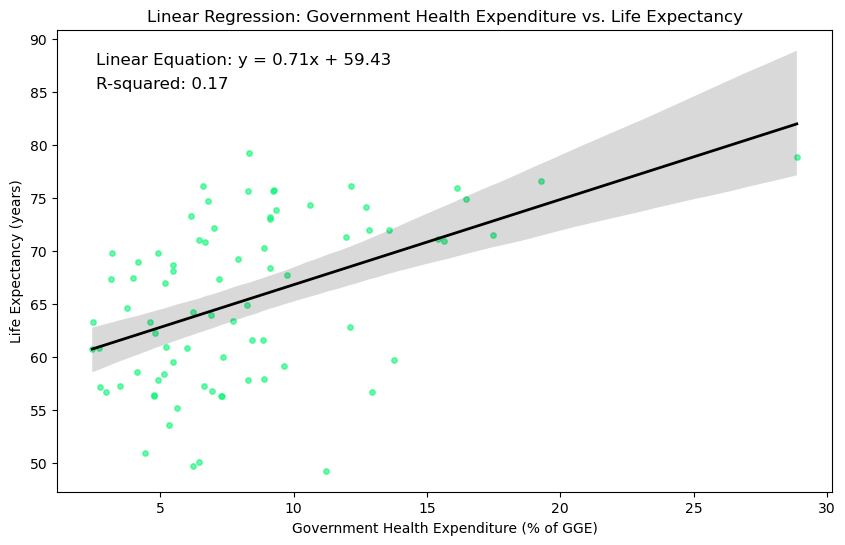

In [184]:
# Basic regression plot
plt.figure(figsize=(10, 6))

sns.regplot(
    x='gov_health_expenditure',
    y='life_expectancy',
    data=df_avg_country,
    ci=95,
    line_kws={'color': 'black', 'linewidth': 2},
    scatter_kws={'color': '#09F574', 's': 15, 'alpha': 0.6}
)


# Add annotations for the linear equation and R-squared value
plt.annotate(
    f'Linear Equation: {linear_equation}',
    xy=(0.05, 0.95), xycoords='axes fraction',
    horizontalalignment='left', verticalalignment='top',
    fontsize=12, color='black'
)

plt.annotate(
    f'R-squared: {r_squared:.2f}',
    xy=(0.05, 0.90), xycoords='axes fraction',
    horizontalalignment='left', verticalalignment='top',
    fontsize=12, color='black'
)

plt.title('Linear Regression: Government Health Expenditure vs. Life Expectancy')
plt.xlabel('Government Health Expenditure (% of GGE)')
plt.ylabel('Life Expectancy (years)')
#plt.ylim(0, 80)
plt.show()

In [185]:
stats.ttest_ind(df_avg_country['life_expectancy'], df_avg_country['gov_health_expenditure'], equal_var=True)

TtestResult(statistic=56.75524534723395, pvalue=4.482608058479646e-106, df=156.0)

In [149]:
stats.ttest_ind(df_avg_country['life_expectancy'], df_avg_country['gov_health_expenditure'], equal_var=False)

TtestResult(statistic=56.75524534723395, pvalue=7.134079983198674e-91, df=124.5661750719571)

In [ ]:
# other plot options

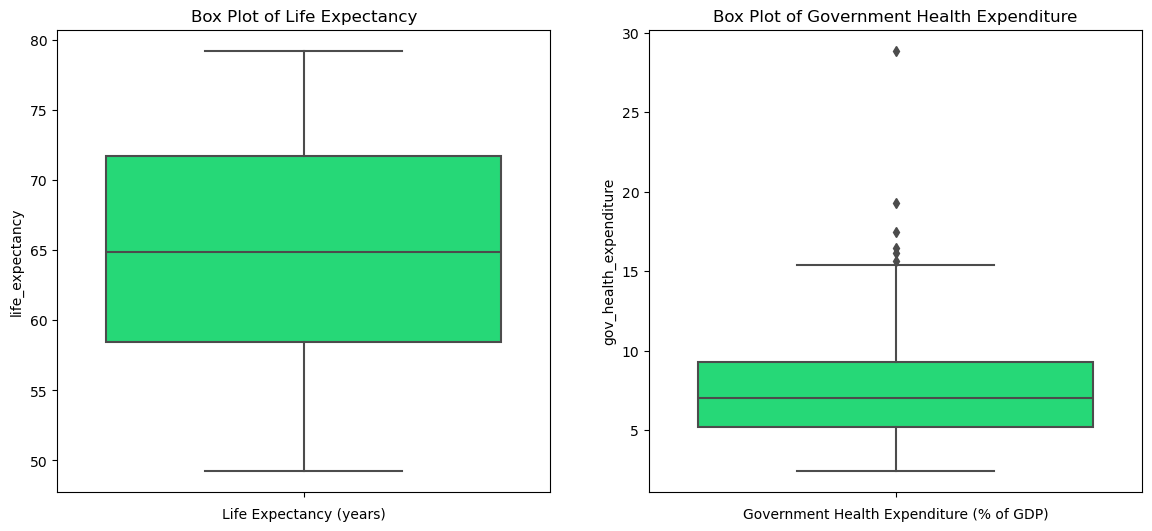

In [175]:
plt.figure(figsize=(14, 6))

# Box plot for life expectancy
plt.subplot(1, 2, 1)
sns.boxplot(y=df_avg_country['life_expectancy'], color="#09F574")
plt.title('Box Plot of Life Expectancy')
plt.xlabel('Life Expectancy (years)')

# Box plot for government health expenditure
plt.subplot(1, 2, 2)
sns.boxplot(y=df_avg_country['gov_health_expenditure'], color="#09F574")
plt.title('Box Plot of Government Health Expenditure')
plt.xlabel('Government Health Expenditure (% of GDP)')

plt.show()

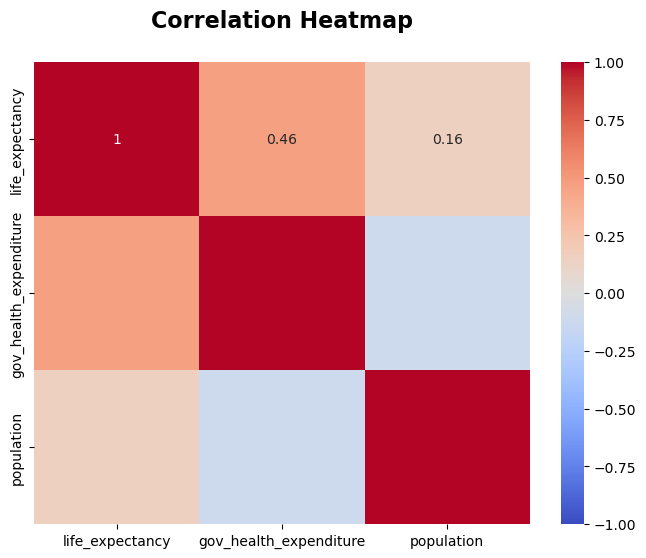

In [204]:
corr = df_avg_country[['life_expectancy', 'gov_health_expenditure', 'population']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap\n', fontweight="bold", fontsize=16)
plt.show()

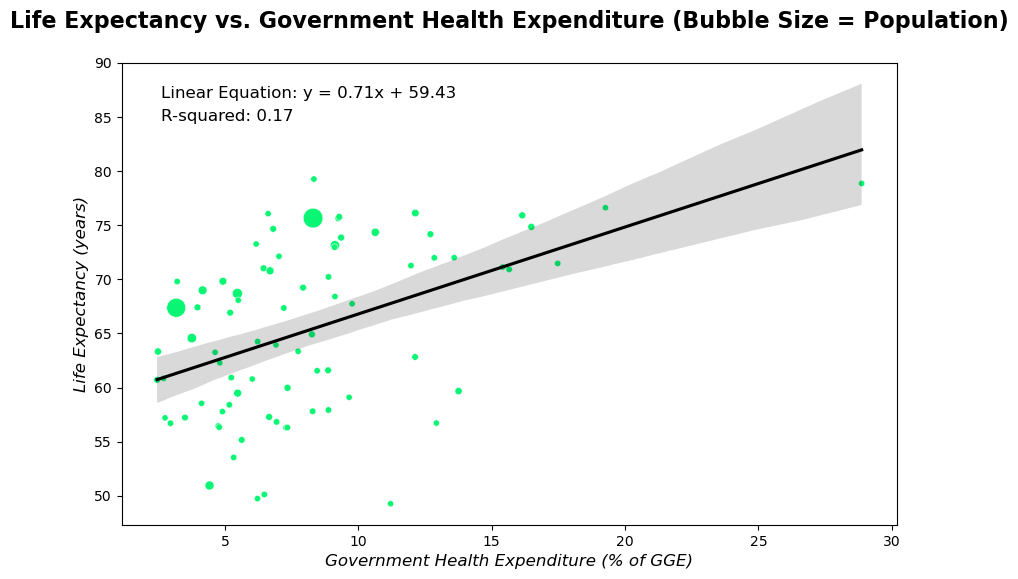

In [202]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_avg_country, x='gov_health_expenditure', y='life_expectancy', size='population', sizes=(20, 200), legend=False, color="#09F574")
sns.regplot(data=df_avg_country, x='gov_health_expenditure', y='life_expectancy', scatter=False, color='black')

# Add annotations for the linear equation and R-squared value
plt.annotate(
    f'Linear Equation: {linear_equation}',
    xy=(0.05, 0.95), xycoords='axes fraction',
    horizontalalignment='left', verticalalignment='top',
    fontsize=12, color='black'
)

plt.annotate(
    f'R-squared: {r_squared:.2f}',
    xy=(0.05, 0.90), xycoords='axes fraction',
    horizontalalignment='left', verticalalignment='top',
    fontsize=12, color='black'
)

plt.title('Life Expectancy vs. Government Health Expenditure (Bubble Size = Population)\n', fontweight="bold", fontsize=16)
plt.xlabel('Government Health Expenditure (% of GGE)', fontsize=12, fontstyle="italic")
plt.ylabel('Life Expectancy (years)', fontsize=12, fontstyle="italic")
#plt.ylim(50, 83)
plt.show()

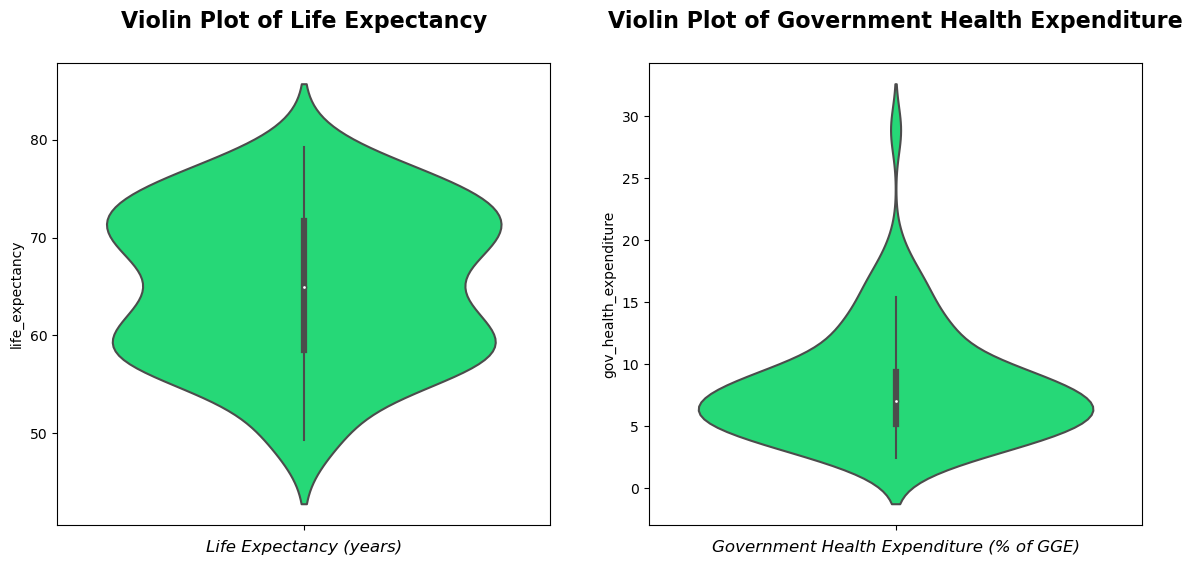

In [200]:
plt.figure(figsize=(14, 6))

# Violin plot for life expectancy
plt.subplot(1, 2, 1)
sns.violinplot(y=df_avg_country['life_expectancy'], color="#09F574")
plt.title('Violin Plot of Life Expectancy\n', fontweight="bold", fontsize=16)
plt.xlabel('Life Expectancy (years)', fontsize=12, fontstyle="italic")

# Violin plot for government health expenditure
plt.subplot(1, 2, 2)
sns.violinplot(y=df_avg_country['gov_health_expenditure'], color="#09F574")
plt.title('Violin Plot of Government Health Expenditure\n', fontweight="bold", fontsize=16)
plt.xlabel('Government Health Expenditure (% of GGE)', fontsize=12, fontstyle="italic")

plt.show()

In [206]:
# logarithmic regression

# Transform the independent variable using a logarithmic function
df_avg_country['log_gov_health_expenditure'] = np.log(df_avg_country['gov_health_expenditure'])
X = df_avg_country['log_gov_health_expenditure']
y = df_avg_country['life_expectancy']
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     19.02
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           3.96e-05
Time:                        19:33:45   Log-Likelihood:                -264.74
No. Observations:                  79   AIC:                             533.5
Df Residuals:                      77   BIC:                             538.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [210]:
# Extract the equation and R-squared value
intercept, slope = model.params
r_squared = model.rsquared
equation = f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_squared:.2f}'


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



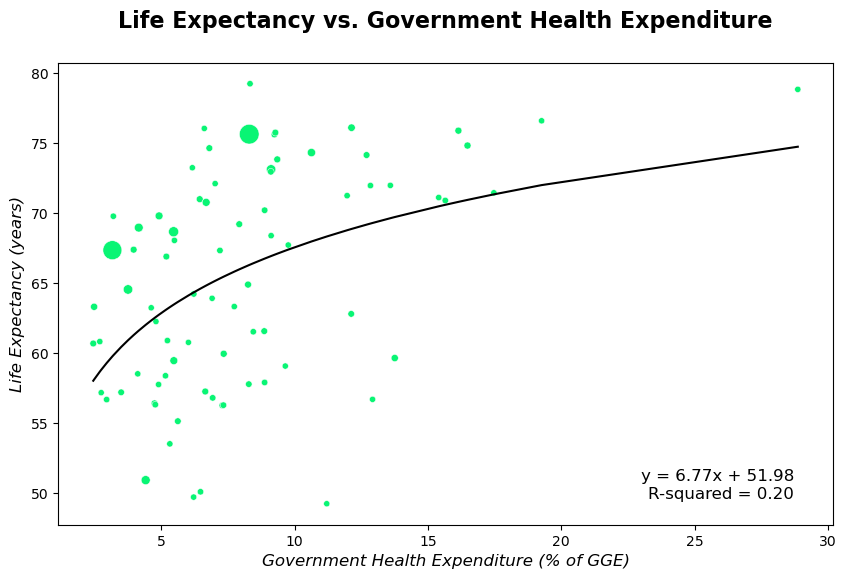

In [219]:
# Plotting using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gov_health_expenditure', y='life_expectancy', size='population', sizes=(20, 200), legend=False, data=df_avg_country, color="#09F574")
sns.lineplot(x=df_avg_country['gov_health_expenditure'], y=model.predict(X), color='black')
plt.xlabel('Government Health Expenditure (% of GGE)', fontsize=12, fontstyle="italic")
plt.ylabel('Life Expectancy (years)', fontsize=12, fontstyle="italic")
plt.title('Life Expectancy vs. Government Health Expenditure\n', fontweight="bold", fontsize=16)

# add in logarithmic equation and r squared
plt.text(0.95, 0.05, equation, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right')


plt.show()